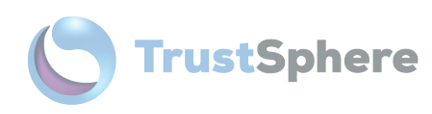

# Presenting Hipo data using Jupyter notebooks 

### Adjacent criteria supplied by Accenture
- Address - Anonymised user name and shortened to 3 (int)
- Department
- Level
 1.	Senior Manager 
 2.	Manager
 3.	Consultant
 4.	Analyst
 5.	Associate
- Location\
   Gurugram \
   Bengaluru \
   Mumbai \
   Pune 
- Department\
    TalentDevelopmentandLearning\
    OrganizationChange\
    HR\
    Organization Analytics

## Post processing derived metrics
### Network Activity Score
Network Activity Score (NAS) gives a measure of how active someone is within their network, with respect to others in the same cohort. \
The algorithm combines a number of factors, including:
- Number of strong relationships
- Number of Active relationships (those which have seen communications within a recent time period)
- Number of medium strength relationships
- Number of Unique relationships (those not shared with others in the same cohort)

### Network Impact Score
Network Impact Score (NIS) gives a measure on the impact a person might have if they left the organisation, with respect to others in the same cohort. \
The algorithm combines a number of factors, including:
- Number of unique relationships
- Number of strong relationships
- Number of Active relationships (those which have seen communications within a recent time period)
- An analysis of the TrustScore values for their strong relationships
- A comparison of active relationships across the cohort

### Network Connector Score
(Internal Relationships only) \
Network Connector Score (NCS) gives a measure of how a person’s relationships can allow them to influence the network, due to their ‘connected-ness’, where they have many strong relationships, relationships outside their teams and/or connect to people that do. \
The algorithm combines a number of factors, including:
- Number of strong relationships
- Number of relationships outside their immediate team
- Number of relationships they have with connected people



In [87]:
#import libraries
import numpy as np
import pandas as pd
import collections
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline
%matplotlib tk
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
# offline mode
from plotly.offline import iplot, init_notebook_mode

In [88]:
#load the data
#previously created by PA toolkit
df=pd.read_csv('Hipo.csv')

In [89]:
#Strip white spaces
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [90]:
#extract the int from address
df['address']=df['address'].str[:7]

In [91]:
df['address']=df['address'].str.extract('(\d+)').astype(int)

In [92]:
df

,address,Department,Level,Location,gender,Tenure,Influencers,Hipo,totrels,strrels,medrels,totactive,stractive,medactive,percactive,unique,nas,nis,ncs
0,122,TalentDevelopmentandLearning,1,Gurugram,female,4,Y,yes,95,25,70,71,24,47,75,1,82,30,100
1,131,TalentDevelopmentandLearning,3,Gurugram,female,7,Y,no,91,14,77,62,13,49,69,1,69,20,66
2,185,TalentDevelopmentandLearning,1,Gurugram,female,15,N,yes,54,24,30,47,22,25,88,,57,24,71
3,287,TalentDevelopmentandLearning,2,Bengaluru,male,15,Y,yes,75,23,52,61,23,38,82,,53,27,86
4,93,OrganizationChange,1,Bengaluru,female,15,N,no,64,15,49,36,13,23,57,,48,13,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,244,OrganizationChange,4,Bengaluru,male,2,N,no,1,0,1,0,0,0,0,,1,0,2
277,147,TalentDevelopmentandLearning,4,Gurugram,female,7,N,no,2,0,2,0,0,0,0,,1,0,3
278,247,TalentDevelopmentandLearning,4,Mumbai,female,1,N,no,1,0,1,0,0,0,0,,1,0,2
279,245,TalentDevelopmentandLearning,4,Gurugram,female,1,N,no,0,0,0,0,0,0,0,,0,0,0


In [93]:
fig = px.bar(df,x='Location',y='ncs',color='gender',hover_name = 'address')
fig.update_layout(title_text='Network Connector Score by Location')
fig.update_yaxes(showticklabels=False)
#fig.show()
iplot(fig)

In [94]:
fig = px.bar(df,x='Department',y='ncs',color='gender',hover_name = 'address')
fig.update_layout(title_text='Network Connector Score by Department',autosize=True,)
fig.update_yaxes(showticklabels=False)
fig.show()

In [95]:
fig = px.scatter(df, x="ncs", y="address",
        size="ncs", color="gender",
                 hover_name="Department", log_x=True, size_max=60)
fig.update_layout(title_text='Network Connector Score by User',autosize=True,)
fig.update_yaxes(showticklabels=False)
fig.show()

In [96]:
#filter by NCS
df2 = df[df['ncs'] > 50]  

In [97]:
#filter by Female Hipo and Influences
femaledf = df.query('gender == "female" and Hipo == "yes" and Influencers =="Y"')

In [98]:
femaledf

,address,Department,Level,Location,gender,Tenure,Influencers,Hipo,totrels,strrels,medrels,totactive,stractive,medactive,percactive,unique,nas,nis,ncs
0,122,TalentDevelopmentandLearning,1,Gurugram,female,4,Y,yes,95,25,70,71,24,47,75,1,82,30,100
8,61,HR,1,Gurugram,female,15,Y,yes,52,21,31,38,20,18,74,,47,19,58
21,91,OrganizationAnalytics,1,Gurugram,female,15,Y,yes,56,14,42,47,14,33,84,,38,20,63
40,154,TalentDevelopmentandLearning,3,Mumbai,female,2,Y,yes,25,8,17,13,6,7,52,,29,6,41
50,57,OrganizationChange,3,Bengaluru,female,4,Y,yes,33,11,22,29,11,18,88,,27,13,39
75,169,OrganizationChange,3,Gurugram,female,2,Y,yes,37,3,34,35,3,32,95,,22,10,37
81,115,TalentDevelopmentandLearning,2,Mumbai,female,7,Y,yes,30,6,24,22,6,16,74,,20,9,33
86,94,TalentDevelopmentandLearning,3,Pune,female,2,Y,yes,19,4,15,13,3,10,69,,19,5,16
94,146,TalentDevelopmentandLearning,4,Pune,female,2,Y,yes,17,4,13,12,3,9,71,,19,5,10
168,234,TalentDevelopmentandLearning,4,Bengaluru,female,4,Y,yes,17,4,13,9,4,5,53,,13,4,20


In [99]:
#Filter by Male Hippo and Influences
maledf = df.query('gender == "male" and Hipo == "yes" and Influencers =="Y"')

In [100]:
maledf

,address,Department,Level,Location,gender,Tenure,Influencers,Hipo,totrels,strrels,medrels,totactive,stractive,medactive,percactive,unique,nas,nis,ncs
3,287,TalentDevelopmentandLearning,2,Bengaluru,male,15,Y,yes,75,23,52,61,23,38,82,,53,27,86
9,166,OrganizationChange,1,Gurugram,male,7,Y,yes,57,21,36,47,21,26,83,,45,23,74
207,241,TalentDevelopmentandLearning,4,Bengaluru,male,2,Y,yes,15,1,14,10,1,9,67,,10,3,8
225,53,TalentDevelopmentandLearning,3,Gurugram,male,2,Y,yes,15,1,14,8,1,7,54,,9,2,12
261,96,TalentDevelopmentandLearning,4,Bengaluru,male,4,Y,yes,5,1,4,2,1,1,40,,5,1,8


In [101]:
df['gender'].value_counts()


female    185
male       96
Name: gender, dtype: int64

In [102]:
bplt=np.round(df.pivot_table(index='Department', columns='Level'))

In [103]:
bplt

Tenure                     address                \
Level                             1    2    3    4    5       1      2      3   
Department                                                                      
HR                              8.0  5.0  3.0  2.0  NaN    41.0  188.0  191.0   
OrganizationAnalytics          15.0  4.0  2.0  1.0  NaN   150.0  146.0  114.0   
OrganizationChange              9.0  6.0  3.0  2.0  NaN   156.0  128.0  166.0   
TalentDevelopmentandLearning   11.0  7.0  5.0  2.0  2.0   161.0  129.0  150.0   

                                            ... totactive                    \
Level                             4      5  ...         1     2     3     4   
Department                                  ...                               
HR                             70.0    NaN  ...      22.0   8.0  13.0  13.0   
OrganizationAnalytics         157.0    NaN  ...      28.0  18.0  11.0  12.0   
OrganizationChange            148.0    NaN  ...      37.0  24.0  21.0  14.0   
TalentDevelopmentandLearning  149.0  290.0  ...      32.0  24.0  13.0   8.0   

                                   totrels                          
Level                            5       1     2     3     4     5  
Department                                                          
HR                             NaN    31.0  12.0  16.0  15.0   NaN  
OrganizationAnalytics          NaN    34.0  30.0  13.0  17.0   NaN  
OrganizationChange             NaN    50.0  29.0  26.0  18.0   NaN  
TalentDevelopmentandLearning  28.0    44.0  32.0  21.0  12.0  34.0  

[4 rows x 60 columns]

In [104]:
#export a Dataframe
#<dataframe>.to_csv(r'filteredD&I.csv', index = False)